In [22]:
##################################################
#################################################

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from ineq import Theil
from preprocessing import complete_vars
from preprocessing import ratios
from preprocessing import breakdown_vars
from preprocessing import dummies_ohe
from preprocessing import Xy
from preprocessing import std_z
from imblearn.under_sampling import RandomUnderSampler
from LocalSearch import SA_min
from LocalSearch import search
from Experiment import hypersearch_GeneticNN
from NeuralNetwork import MLP

In [24]:
df_train = pd.read_csv("Datapooled.csv")

VARS = ['Ganancia bruta', 'Ganancia (pérdida)','Ingresos de actividades ordinarias' , 'Costo de ventas', 'Patrimonio total',
     'Total pasivos', 'Total de activos', 'Ganancias acumuladas',  'Pasivos corrientes totales',  'Activos corrientes totales']

df_train.rename(columns={'Clasificación Industrial Internacional Uniforme Versión 4 A.C':'Sector'}, inplace=True)

df_train = df_train[VARS+[ 'event', 'Sector']]
print(df_train[df_train['event']==1].info())
df_train['complete-vars'] = complete_vars(df_train) #1 is that have all variables!
df_train =  df_train[df_train['complete-vars']==1] #filtering firms that have not financial information 
print(df_train[df_train['event']==1].info())
df_train = ratios(df_train)
predictors =[ 'GPM', 'NPM', 'ROE','ROA', 'IR', 'DER', 'RSL', 'CR', 'Ax1', 'Ax2', 'Sector']
print(df_train[df_train['event']==1].info())
df_train.replace([np.inf,-np.inf], np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.drop(columns=['complete-vars'], inplace=True)
df_train = df_train[predictors + ['event']].copy()
df_exp = df_train.copy()

X, y = Xy(df_train, 'event')
cat, binaries, nonormal, normal  = breakdown_vars(X)
nums = nonormal + normal
X = dummies_ohe(X, cat) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 666, stratify=y)
rus = RandomUnderSampler(random_state=123)
X_train, y_train = rus.fit_resample(X_train, y_train)
from preprocessing import standardize_X_test
X_test = standardize_X_test(X_train, X_test) # Apply the mean and std of X_test with info from X_train
X_train = std_z(nonormal + normal, X_train)

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 4 to 26499
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ganancia bruta                      353 non-null    float64
 1   Ganancia (pérdida)                  353 non-null    float64
 2   Ingresos de actividades ordinarias  353 non-null    float64
 3   Costo de ventas                     330 non-null    float64
 4   Patrimonio total                    353 non-null    float64
 5   Total pasivos                       353 non-null    float64
 6   Total de activos                    353 non-null    float64
 7   Ganancias acumuladas                351 non-null    float64
 8   Pasivos corrientes totales          352 non-null    float64
 9   Activos corrientes totales          353 non-null    float64
 10  event                               771 non-null    float64
 11  Sector                              771 non-null

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
vars = [
'ROE', 'ROA', 
'IR', 'DER', 
'RSL', 'CR', 
'Sector_C', 'Sector_I',
'Sector_K', 'Sector_L', 
'Sector_O', 'Sector_Q',
'Sector_R', 'Sector_U'
]


In [26]:
X_train, X_test = X_train.loc[:, vars],  X_test.loc[:, vars]

In [27]:
## Poner mi algoritmo a competir con una red neuronal para maximizar el F1
## y también tomar todas las métricas que hagan falta claramente...
architecture = (5,5,1)
Pop_sizes  = [150] #75  
generations = [80]
Mutations = [0.01, 0.05]
Tournaments = [3]
Cross = [0.75, 0.85] 
probs_mate = [0.5]  
probs_mutate = [0.01 , 0.03]

regist = hypersearch_GeneticNN(X_train = X_train, y_train=y_train,
                      architecture= architecture,
                      pop_sizes=Pop_sizes,
                      generations=generations,
                      tournaments_sizes=Tournaments,
                      mutations=Mutations,
                      crossovers = Cross,
                      mate_indpb =probs_mate,
                      mutate_indpb = probs_mutate,
                      limit_unchanged =80)

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Verbose: (150, 80, 3, 0.01, 0.75, 0.5, 0.01)


c:\Users\sjrp2\Desktop\napo\IA-trujillo\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


---------------
Generation:  1
---------------
Fitest : 1.0555358591104989 Inequality:  0.037077746582729366 Generation without improvement:  0
Stats mean:  5.562176299772579 std:  3.57426420509403 min: 1.0555358591104989 max:  16.117540102083282
1.0555358591104989 0.037077746582729366 0 (5.562176299772579, 3.57426420509403, 1.0555358591104989, 16.117540102083282)
---------------
Generation:  2
---------------
Fitest : 1.181806070857652 Inequality:  0.03353257148124571 Generation without improvement:  0
Stats mean:  4.761239948979051 std:  2.934812298432697 min: 1.181806070857652 max:  15.983572901753941
1.181806070857652 0.03353257148124571 0 (4.761239948979051, 2.934812298432697, 1.181806070857652, 15.983572901753941)
---------------
Generation:  3
---------------
Fitest : 1.0647579762254944 Inequality:  0.03587767158026779 Generation without improvement:  0
Stats mean:  4.307290053464576 std:  2.722340939973989 min: 1.0647579762254944 max:  14.330412183206015
1.0647579762254944 0.03

In [28]:
from gentools import select_optimun_parameters
from sklearn.metrics import f1_score
parameters_ = select_optimun_parameters(regist=regist,
                           architecture=architecture,
                             k_folds=10, 
                             X_train=X_train, 
                             y_train=y_train,
                             assessment_metric = f1_score)

From here is the fittest (150, 80, 3, 0.01, 0.75, 0.5, 0.01)
(0.7097222222222223, 0.001301020408163267)


In [29]:
from GeneticNeuralNetwork import gaMLP_Entropy
fittest_individual, history, stats = gaMLP_Entropy(
                    architecture= architecture,
                    population_size=parameters_[0],
                    max_generations= parameters_[1],
                    tournament_size=parameters_[2],
                    MUTPB=parameters_[3],
                    CXPB=parameters_[4], 
                    mate_indpb= parameters_[5],
                    mutate_indpb=parameters_[6],
                    ineq_measure=Theil,
                    ineq_min  = 0,
                    limit_unchanged=80,
                    X_train = X_train, 
                    y_train = y_train,
                    verbose=True)

from sklearn.metrics import classification_report
preds_GA = np.where(MLP(architecture=architecture, X_train=X_test, y_train=y_test, initial_solution=fittest_individual, preds=True)>0.5,1,0)
GA  = pd.DataFrame(classification_report(y_test, preds_GA, output_dict=True)).iloc[:,0:2]
GA

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\Desktop\napo\IA-trujillo\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


---------------
Generation:  1
---------------
Fitest : 0.8981263909651664 Inequality:  0.03880570613921368 Generation without improvement:  0
Stats mean:  5.133537014689877 std:  3.34914005988031 min: 0.8981263909651664 max:  15.995246305024976
0.8981263909651664 0.03880570613921368 0 (5.133537014689877, 3.34914005988031, 0.8981263909651664, 15.995246305024976)
---------------
Generation:  2
---------------
Fitest : 0.8981263909651664 Inequality:  0.034272434042282474 Generation without improvement:  0
Stats mean:  4.421005812395774 std:  2.6805491701351722 min: 0.8981263909651664 max:  15.508572645805819
0.8981263909651664 0.034272434042282474 0 (4.421005812395774, 2.6805491701351722, 0.8981263909651664, 15.508572645805819)
---------------
Generation:  3
---------------
Fitest : 0.7601826873222661 Inequality:  0.03627163185326715 Generation without improvement:  1
Stats mean:  3.8750631477251214 std:  2.423390753285612 min: 0.7601826873222661 max:  12.35326577940587
0.760182687322266

,0.0,1.0
precision,0.996681,0.045564
recall,0.637743,0.890625
f1-score,0.777798,0.086692
support,3296.000000,64.000000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


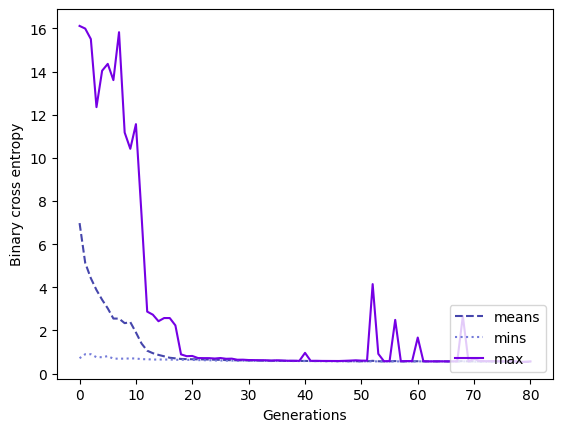

In [30]:
from gentools import plot_stats
plot_stats(stats,Title = 'Binary cross entropy', path='Convergence-binary.eps')

In [31]:
SA_sol  =  SA_min(solution = fittest_individual, search=search,
         fitnessFunction = lambda x: MLP(architecture = architecture,
                        X_train = X_train,
                          y_train = y_train, 
                          initial_solution = x),
         Tf = 0,
         cooling_rate  = 35,
         max_iterations = 180,
         beta = 0.001,
         alpha = 0.1,
         seed_random=777,
         reduce_temp=0.000001)

1
(0.5396448807354404,) Temperature : 0.0005400198424316873
2
(0.5345919761004033,) Temperature : 0.0005390198424316873
3
(0.5307451958908289,) Temperature : 0.0005380198424316873
4
(0.5264227480556802,) Temperature : 0.0005370198424316873
5
(0.5276009187375992,) Temperature : 0.0005360198424316872
6
(0.5272598047098129,) Temperature : 0.0005350198424316872
7
(0.5278834643163767,) Temperature : 0.0005340198424316872
8
(0.5242751223725424,) Temperature : 0.0005330198424316872
9
(0.5265703202304491,) Temperature : 0.0005320198424316871
10
(0.5237142237064757,) Temperature : 0.0005310198424316871
11
(0.5242203263501152,) Temperature : 0.0005300198424316871
12
(0.5234260650553293,) Temperature : 0.0005290198424316871
13
(0.5252263307826225,) Temperature : 0.000528019842431687
14
(0.5231003090137153,) Temperature : 0.000527019842431687
15
(0.5205290980781673,) Temperature : 0.000526019842431687
16
(0.5207908065181012,) Temperature : 0.000525019842431687
17
(0.5201644089339059,) Temperature 

In [32]:
preds_SA = np.where(MLP(architecture=architecture, X_train=X_test, y_train=y_test, initial_solution=SA_sol['minor'][1], preds=True)>0.5,1,0)
SA  = pd.DataFrame(classification_report(y_test, preds_SA, output_dict=True)).iloc[:,0:2]
SA

c:\Users\sjrp2\Desktop\napo\IA-trujillo\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


,0.0,1.0
precision,0.994867,0.050881
recall,0.705704,0.812500
f1-score,0.825701,0.095764
support,3296.000000,64.000000


In [33]:
models_tab = pd.concat([GA, SA,], axis=1)
cols_names =  pd.MultiIndex.from_tuples([('Genetic training','No-Default'),("Genetic training",'Deafult'),
              ("Genetic annealing",'No-Default'),('Genetic annealing','Default'),
              ])
models_tab.columns  = cols_names
models_tab = models_tab.style.set_table_styles([
   {'selector': 'th','props': [('text-align', 'center')]}]).format(precision=2)
models_tab.to_latex("Resutlts-models-binary.tex")
models_tab